# Micro and Macro Averaging

`Precision` and `Recall` are two commonly used metrics to assess the performance of a classification model. The metrics are fairly intuitive with binary classification. But when it comes to multi-class classification these metrics need to be tweaked a bit to measure performance of each class. 

This tutorial explains the concepts of `micro` and `macro` averaging and the scenarios in which to use each of the two approaches.

## Basic Concepts

Precision is the proportion of positive identifications that were actually correct.

Precision = $\frac{True   Positives}{True   Positives + False   Positives}$

Recall is the proportion of the actual positives that were correctly identified.

Recall = $\frac{True   Positives}{True   Positives + False   Negatives}$

Now let's load some data and train a classifier.

In [1]:
from sklearn.datasets import load_iris as load_data, make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn_evaluation import plot

X, y = load_data(return_X_y=True)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_pred = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict(X_test)

target_names = ["A", "B", "C"]

## Micro-average approach

The `micro-average` precision and recall score is calculated from the individual classes’ `true positives (TPs)`, `true negatives (TNs)`, `false positives (FPs)`, and `false negatives (FNs)` of the model. It aggregates the contributions of all classes to compute the average metric and weights each sample equally.

Let's plot the confusion matrix and derive each metric.

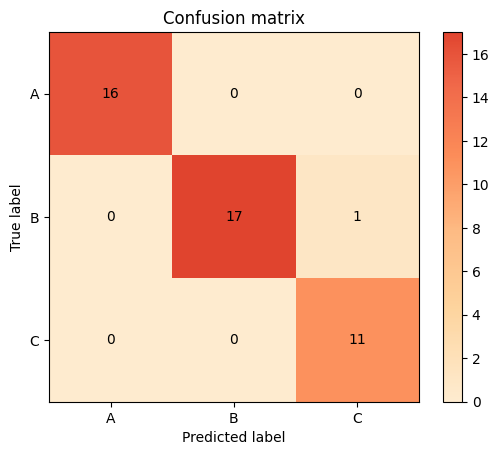

In [2]:
plot.ConfusionMatrix.from_raw_data(y_test, y_pred, target_names=target_names)

**Metrics for micro-average precision:**

```{note}
True Positives (TPs) are the metrics on the main diagonal. 

False Positives (FPs) are the metrics on the columns excluding the ones in the main diagonal, e.g., FPs for class A are cells (2,1) and (3,1).
```

$TP_A$ = 16

$FP_A$ = 0

$TP_B$ = 17

$FP_B$ = 0

$TP_C$ = 11

$FP_C$ = 1

`Micro-average precision` = $\frac{TP_A + TP_B + TP_C} {TP_A + TP_B + TP_C + FP_A + FP_B + FP_C}$ = $\frac{16+17+11} {16+17+11+0+0+1}$ = $\frac{44}{45}$ = 0.97

**Metrics for micro-average recall:**

```{note}
False Negatives (FNs) are the metrics on the rows excluding the ones in the main diagonal, e.g., FNs for class A are cells (1,2) and (1,3).
```

$FN_A$ = 0

$FN_B$ = 1

$FN_C$ = 0

`Micro-average recall` = $\frac{TP_A + TP_B + TP_C} {TP_A + TP_B + TP_C + FN_A + FN_B + FN_C}$ = $\frac{16+17+11} {16+17+11+0+1+0}$ = $\frac{44}{45}$ = 0.97

We can see that the micro-average precision and micro-average recall values are the same. This is because, if there is false positive, there will always be a corresponding false negative and vice versa. For example, if a sample's actual class is B, but it is predicted as A, it is a false positive for class A, but a false negative for  class B.

## Macro-average approach

The `macro-average` precision and recall scores are calculated as arithmetic mean of individual classes’ `precision` and `recall` scores. Macro-average deals with aggregates or totals and studies the metrics as a whole.

Let's view the classification report.

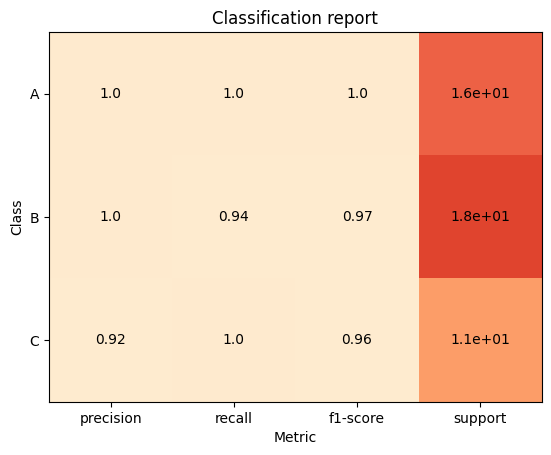

In [3]:
plot.ClassificationReport.from_raw_data(y_test, y_pred, target_names=target_names)

`Macro-average precision` = $\frac{Precision_A + Precision_B + Precision_C} {3}$ = $\frac{2.92}{3}$ = 0.97

`Macro-average recall` = $\frac{Recall_A + Recall_B + Recall_C} {3}$ = $\frac{2.94}{3}$ = 0.98

The Iris dataset used above is fairly balanced, and we can see in such cases the micro-average and macro-average precision and recall scores are the same.

## Imbalanced Dataset

Now let's see how the micro and macro average scores vary when the dataset is an imbalanced one.

Let's create an imbalanced dataset.

In [4]:
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(
    200,
    5,
    n_informative=3,
    n_classes=3,
    class_sep=0.8,
    weights=[0.75, 0.1, 0.15],
    random_state=0,
)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_pred = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict(X_test)

target_names = ["A", "B", "C"]

<Axes: title={'center': 'Class Balance for 140 Instances'}, ylabel='support'>

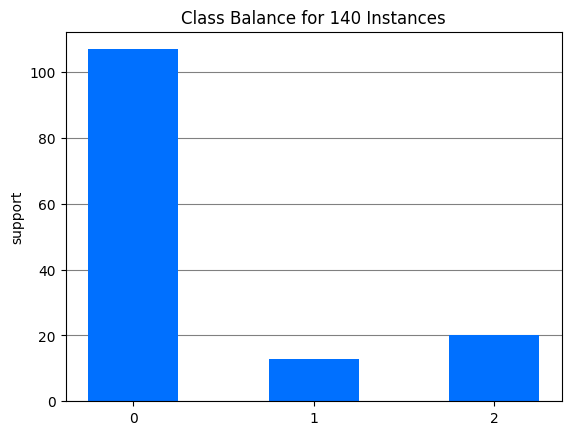

In [5]:
plot.target_analysis(y_train)

Generate the metrics on this imbalanced dataset.

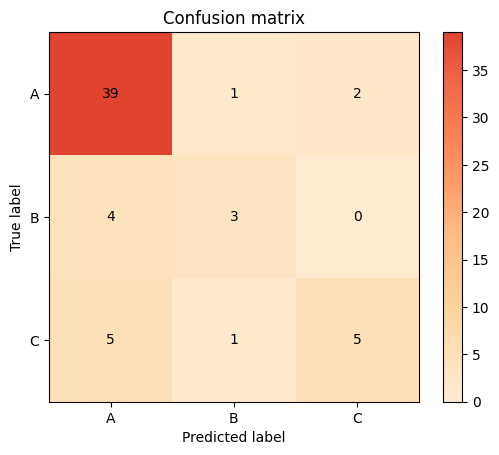

In [6]:
plot.ConfusionMatrix.from_raw_data(y_test, y_pred, target_names=target_names)

`Micro-average precision` = $\frac{39+3+5}{39+3+5+9+2+2}$ = $\frac{47}{60}$ = 0.78

`Micro-average recall` = $\frac{39+3+5}{39+3+5+3+4+6}$ = $\frac{47}{60}$ = 0.78

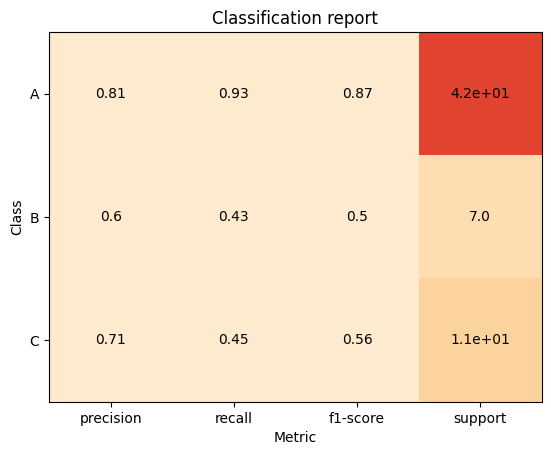

In [7]:
plot.ClassificationReport.from_raw_data(y_test, y_pred, target_names=target_names)

`Macro-average precision` = $\frac {0.81 + 0.6 + 0.71} {3}$ = 0.70

`Macro-average recall` = $\frac {0.93 + 0.43 + 0.45} {3}$ = 0.60

We can see that the macro-average precision and recall scores are lower than the micro-average ones. This is because the False Negatives of Classes `B` and `C` are higher than that of class `A` due to class imbalance.

## Micro-average vs Macro-average

- If the dataset is balanced, both micro-average and macro-average will result in similar scores.
- If the larger class in an imbalanced dataset performs better than the minority classes (the number of True Positives is significantly higher than the number of False Positives), the micro-average score will be higher than the macro-average score.
- In a noisy dataset, the number of True Positives might be significantly lower than the number of False Positives for the majority class. In such a case, the macro-average score will be higher than the micro-average score. But this would be a bit misleading since a large number of examples are not properly classified.

## Which approach to take

- Micro-averaging does not distinguish between classes and just averages the metrics. Hence, the scores are not affected if the test set is unequally distributed. Prefer this method if you are interested in the overall data and not inclined to a particular class.
- If there is a class which occurs less frequently but is equally important as the rest, then macro-average is the preferred metric.


```{eval-rst}
.. tip::
   
   To understand how to plot micro-average curves, refer :class:`sklearn_evaluation.plot.ROC` and :class:`sklearn_evaluation.plot.PrecisionRecall`.

```